<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Деревья решений, случайные леса (практика)</center></h2>

**Срок сдачи:** 3 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 3 апреля, -4 балла после 06:00 10 апреля, -6 баллов после 06:00 17 апреля

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# Практика

### Качество вина (10 баллов)

Давайте все-таки разберемся с [вином](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)!


#### Задание (1 балл)
* Загрузите данные, выполните преобразование целевой переменной: 
    * quality > 5 -> 1
    * quality <= 5 -> 0
* Разделите выборку на обучающую и контрольную в пропорции 80/20

In [2]:
df_wine = pd.read_csv('winequality-red.csv', sep=';')

In [3]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_wine.loc[:, 'quality'] = (df_wine.loc[:, 'quality'] > 5).astype(int)

In [5]:
X, y = df_wine.iloc[:, :-1].values, df_wine.iloc[:, -1].values

In [6]:
X[:10]

array([[  7.40000000e+00,   7.00000000e-01,   0.00000000e+00,
          1.90000000e+00,   7.60000000e-02,   1.10000000e+01,
          3.40000000e+01,   9.97800000e-01,   3.51000000e+00,
          5.60000000e-01,   9.40000000e+00],
       [  7.80000000e+00,   8.80000000e-01,   0.00000000e+00,
          2.60000000e+00,   9.80000000e-02,   2.50000000e+01,
          6.70000000e+01,   9.96800000e-01,   3.20000000e+00,
          6.80000000e-01,   9.80000000e+00],
       [  7.80000000e+00,   7.60000000e-01,   4.00000000e-02,
          2.30000000e+00,   9.20000000e-02,   1.50000000e+01,
          5.40000000e+01,   9.97000000e-01,   3.26000000e+00,
          6.50000000e-01,   9.80000000e+00],
       [  1.12000000e+01,   2.80000000e-01,   5.60000000e-01,
          1.90000000e+00,   7.50000000e-02,   1.70000000e+01,
          6.00000000e+01,   9.98000000e-01,   3.16000000e+00,
          5.80000000e-01,   9.80000000e+00],
       [  7.40000000e+00,   7.00000000e-01,   0.00000000e+00,
          1.90

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [9]:
print X_train.shape
print X_test.shape

(1279L, 11L)
(320L, 11L)


#### Задание (2 балла)

Сфокусируемся на одном гиперпараметре деревьев решений - максимальной глубине.

Подберите наилучшую глубину `d` дерева с помошью 
* Усредненной оценки качества roc-auc на кросс-валидации при различных `d`
* Валидационных кривых

In [10]:
from sklearn.tree import DecisionTreeClassifier

try:
    from sklearn.model_selection import cross_val_score
except ImportError:
    from sklearn.cross_validation import cross_val_score

try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

In [11]:
scores = []

for d in xrange(1, 20):
    model = DecisionTreeClassifier(max_depth=d, random_state=123)
    scores.append(cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean())

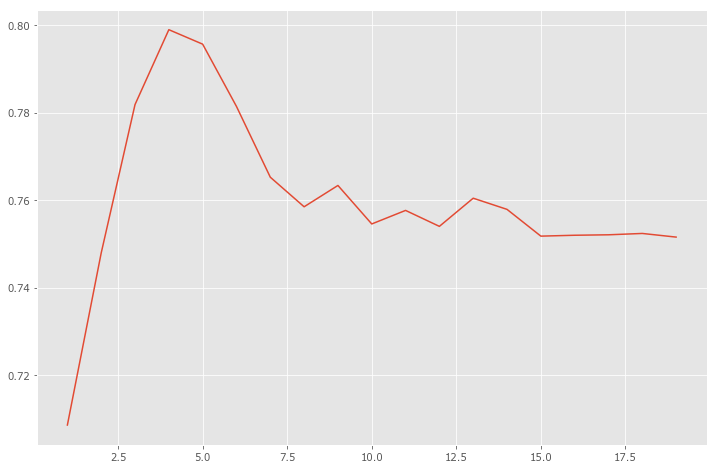

In [12]:
plt.plot(range(1,20), scores)

In [13]:
# При мере качества roc-auc виден явный пик на глубине 4
# Если выбрать меру качества accuracy, то выбрать оптимальную глубину окажется не так просто.

# Воспользуемся validation_curve
# По сути - этот метод делает тоже самое что наш цикл с cross_val_score, но в результате возвращаются мера качества
# как на тестовой части каждого из фолдов, так и на обучающей части

In [14]:
model = DecisionTreeClassifier(random_state=123)
train_scores, test_scores = validation_curve(model, X_train, y_train, 'max_depth',
                                             range(1, 20), n_jobs=-1, cv=5, scoring='roc_auc')

In [15]:
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

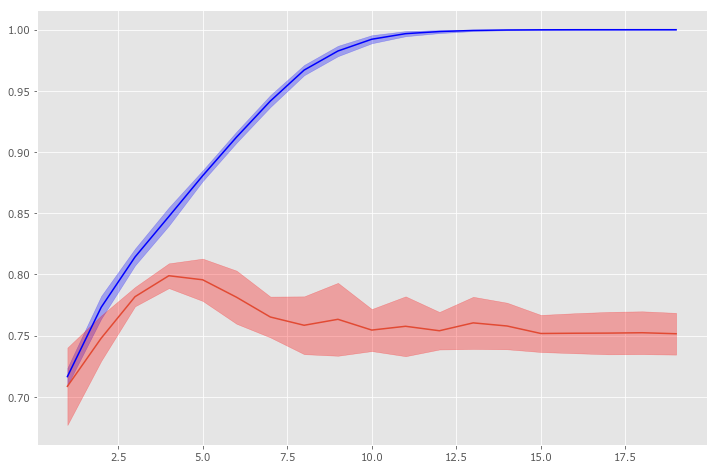

In [16]:
d = range(1,20)
plt.plot(d, train_mean, color='b')
plt.plot(d, test_mean)

plt.fill_between(d, train_mean-train_std, train_mean+train_std, color='b', alpha=0.3)
plt.fill_between(d, test_mean-test_std, test_mean+test_std, color='r', alpha=0.3)

In [17]:
# При roc-auc видем тот же самый пик
# Если выбрать меру качества accuracy, то на той глубине, где accuracy был наибольший (где-то в районе 13) ошибка на 
# на трейновой части минимальная - то есть очень сильное переобучение.

# Основываясь, во-первых, на том, что по roc-auc виден пик при max_depth=4, и во-вторых на том, что переобучение по 
# accuracy не такое сильное при max_depth=4, а качество будет повыше, чем в окрестности, то я бы выбрал глубину = 4

#### Задание (1 балл)

Отсортируйте признаки по важности. Вектор с важностью признаков можно получить с помощью `model.feature_importances_`

In [18]:
model = DecisionTreeClassifier(random_state=123, max_depth=4) 
model.fit(X_train, y_train)

importances = model.feature_importances_

In [19]:
importance_dict = dict(zip(df_wine.columns, importances))
sorted(importance_dict, key=importance_dict.get)[::-1]

['alcohol',
 'sulphates',
 'volatile acidity',
 'total sulfur dioxide',
 'free sulfur dioxide',
 'pH',
 'density',
 'citric acid',
 'fixed acidity',
 'chlorides',
 'residual sugar']

#### Задание (2 балла)
* Получите предсказания на тестовой выборке
* Постройте ROC кривые для обучающей и тестовой выборок
* Посчитайте остальные меры качества классификации при пороге в `0.5`

In [20]:
# Предсказания на тестовой выборке
predictions_test = model.predict(X_test)
probability_predictions_test = model.predict_proba(X_test)

In [21]:
# Предсказания на обучающей выборке
predictions_train = model.predict(X_train)
probability_predictions_train = model.predict_proba(X_train)

In [22]:
from sklearn import metrics
# Для тестовой выборки, с учетом вероятности 1 класса
fpr, tpr, thresholds = metrics.roc_curve(y_test, probability_predictions_test[:,1], pos_label=1)

Populating the interactive namespace from numpy and matplotlib


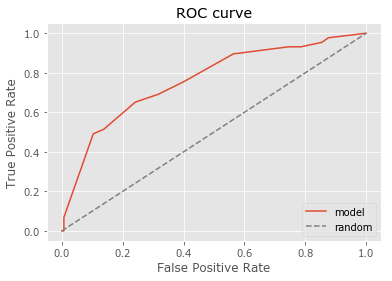

In [23]:
%pylab inline
pylab.plot(fpr, tpr, label = 'model') 
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random') 
pylab.xlim([-0.05, 1.05]) 
pylab.ylim([-0.05, 1.05]) 
pylab.xlabel('False Positive Rate') 
pylab.ylabel('True Positive Rate') 
pylab.title('ROC curve') 
pylab.legend(loc = "lower right")

In [24]:
# Для обучающей выборки, с учетом вероятности 0 класса
fpr, tpr, thresholds = metrics.roc_curve(y_train, probability_predictions_train[:,0], pos_label=0)

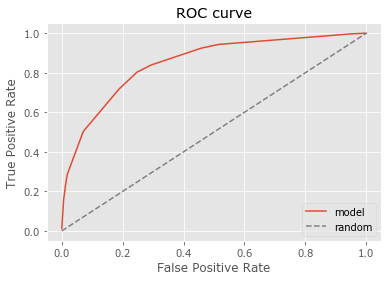

In [25]:
pylab.plot(fpr, tpr, label = 'model') 
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random') 
pylab.xlim([-0.05, 1.05]) 
pylab.ylim([-0.05, 1.05]) 
pylab.xlabel('False Positive Rate') 
pylab.ylabel('True Positive Rate') 
pylab.title('ROC curve') 
pylab.legend(loc = "lower right")

In [26]:
# Посчитаем другие меры качества при пороге 0.5
from sklearn import metrics
from sklearn.preprocessing import Binarizer

In [27]:
binarizer = Binarizer(threshold=0.5).fit_transform(probability_predictions_test)
metrics.accuracy_score(y_test, binarizer[:,1]) # accuracy_score для тестовой выборки

0.6875

In [28]:
print metrics.precision_score(y_test, binarizer[:,1], pos_label=1) # precision для 0 класса
print metrics.precision_score(y_test, binarizer[:,1], pos_label=0) # precision для 1 класса

0.724550898204
0.647058823529


In [29]:
print metrics.f1_score(y_test, binarizer[:,1], pos_label=1) # f1 для 1 класса
print metrics.f1_score(y_test, binarizer[:,1], pos_label=0) # f1 для 0 класса

0.707602339181
0.664429530201


In [30]:
print metrics.recall_score(y_test, binarizer[:,1], pos_label=1) # recall для 1 класса
print metrics.recall_score(y_test, binarizer[:,1], pos_label=0) # recall для 0 класса

0.691428571429
0.68275862069


In [31]:
print metrics.classification_report(y_test, binarizer[:,1])

             precision    recall  f1-score   support

          0       0.65      0.68      0.66       145
          1       0.72      0.69      0.71       175

avg / total       0.69      0.69      0.69       320



In [32]:
metrics.roc_auc_score(y_test, binarizer[:,1])

0.68709359605911324

In [33]:
metrics.average_precision_score(y_test, binarizer[:,1])

0.79236473481608216

#### Задание (1 балл)
Перейдем к модели случайного леса. Зафиксируем некоторую глубину дерева (можно звять оптимальное с предыдущих заданий).

Сравните качество работы 
* Простого дерева решений
* Бэггинга над 10,20,...,100 деревьями решений
* Случайного леса с 10,20,...,100 деревьями решений

Получите график, у которого по оси X откладывается количество деревьев, а по оси Y - качество классификации.

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [35]:
simple_model = DecisionTreeClassifier(random_state=123, max_depth=4)

In [36]:
simple_model.fit(X_train, y_train)
simple_model_lables = simple_model.predict_proba(X_test)

In [37]:
metrics.roc_auc_score(y_test, simple_model_lables[:,1])

0.7621871921182265

In [38]:
#Модель случайного леса
scores_train = []
scores_test = []

for d in range(10, 100, 10):
    
    model = RandomForestClassifier(n_estimators=d, max_depth=4, random_state=125)
    scores_train.append(cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean())
    model.fit(X_train, y_train)
    labels = model.predict_proba(X_test)
    res_lables = metrics.roc_auc_score(y_test, labels[:,1])
    scores_test.append(res_lables)

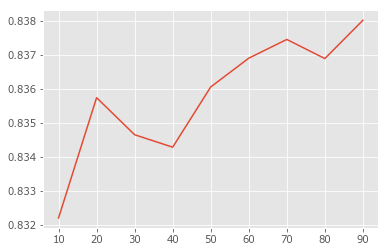

In [39]:
plt.plot(range(10, 100, 10), scores_train)

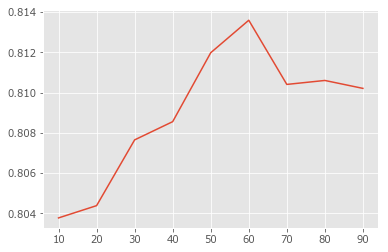

In [40]:
plt.plot(range(10, 100, 10), scores_test)

In [41]:
# Бэггинг 
scores_test = []
scores_train = []

for d in range(10, 100, 10):
    
    model = BaggingClassifier(n_estimators=d, random_state=123)
    scores_train.append(cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean())
    model.fit(X_train, y_train)
    labels = model.predict_proba(X_test)
    res_lables = metrics.roc_auc_score(y_test, labels[:,1])
    scores_test.append(res_lables)

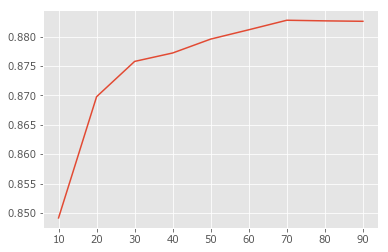

In [42]:
plt.plot(range(10, 100, 10), scores_train)

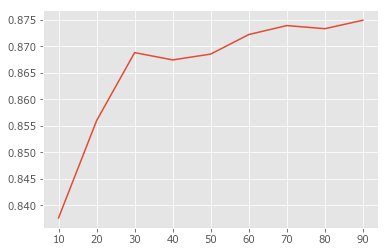

In [43]:
plt.plot(range(10, 100, 10), scores_test)

модель беггинга показала себя наилучшим образом, модель случайного леса чуть хуже

модель простого дерева работает значительно хуже

####  Задание (3 балла)
* С помощью `GridSearchCV` или `RandomSearchCV` подберите наиболее оптимальные параметры для случайного леса.
* Для этих параметров сравните средние результаты по кросс-валидации и качество на контрольной выборке

In [44]:
from sklearn import grid_search
from sklearn import cross_validation

C:\Users\Uaer\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Uaer\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [45]:
clf = RandomForestClassifier(random_state=1234)
clf.get_params().keys()

['warm_start',
 'oob_score',
 'n_jobs',
 'verbose',
 'max_leaf_nodes',
 'bootstrap',
 'min_samples_leaf',
 'n_estimators',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'criterion',
 'random_state',
 'min_impurity_split',
 'max_features',
 'max_depth',
 'class_weight']

In [46]:
param_grid = {
    'max_depth' : range(1, 20),
    'n_estimators' : range(1, 100, 10),   
}

In [47]:
grid_cv = grid_search.GridSearchCV(clf, param_grid, scoring='roc_auc')

In [48]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1234,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [49]:
grid_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=18, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=91, n_jobs=1, oob_score=False, random_state=1234,
            verbose=0, warm_start=False)

In [50]:
print grid_cv.best_score_
print grid_cv.best_params_

0.876923777071
{'n_estimators': 91, 'max_depth': 18}


In [51]:
model = RandomForestClassifier(random_state=123, n_estimators=91, max_depth=15).fit(X_train, y_train)

In [52]:
# Качество модели с оптимальными параметрами на контрольной выборке (roc_auc)
labels_proba = model.predict_proba(X_test)
score_proba = metrics.roc_auc_score(y_test, labels_proba[:,1])
score_proba

0.8816551724137931

In [53]:
# Качество модели с оптимальными параметрами на кросс-валидации (accuracy)
labels = model.predict(X_test)
score = metrics.accuracy_score(y_test, labels)
score

0.81562500000000004

In [54]:
# Качество модели с оптимальными параметрами на кросс-валидации (accuracy)
score_train = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
score_train

0.81546874999999996

In [55]:
# Качество модели с оптимальными параметрами на кросс-валидации (recall)
labels = model.predict(X_test)
score = metrics.recall_score(y_test, labels)
score

0.84571428571428575

In [56]:
# Качество модели с оптимальными параметрами на кросс-валидации (recall)
score_train = cross_val_score(model, X_train, y_train, cv=5, scoring='recall').mean()
score_train

0.83676470588235285

In [57]:
# Качество модели с оптимальными параметрами на кросс-валидации (precision)
labels = model.predict(X_test)
score = metrics.precision_score(y_test, labels)
score

0.82222222222222219

In [58]:
# Качество модели с оптимальными параметрами на кросс-валидации (precision)
score_train = cross_val_score(model, X_train, y_train, cv=5, scoring='precision').mean()
score_train

0.82053017566214714

In [59]:
# Качество модели с оптимальными параметрами на кросс-валидации (f1)
labels = model.predict(X_test)
score = metrics.f1_score(y_test, labels)
score

0.83380281690140845

In [60]:
# Качество модели с оптимальными параметрами на кросс-валидации (f1)
score_train = cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean()
score_train

0.8283016462642705

 Показатели довольно высокие (при различных метриках)
 
 также не наблюдается эффекта переобучения: качество на обучающей выборке примерно равно качеству на тестовой выборке. 
 
 Вывод: полученная модель хорошего качества